In [45]:
# Import all the tools needed

# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, accuracy_score

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer-Churning-Prediction/data/Churn.csv")
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [24]:
# Let's find out how many of each class are there
df["Churn"].value_counts()

No     5175
Yes    1869
Name: Churn, dtype: int64

<Axes: >

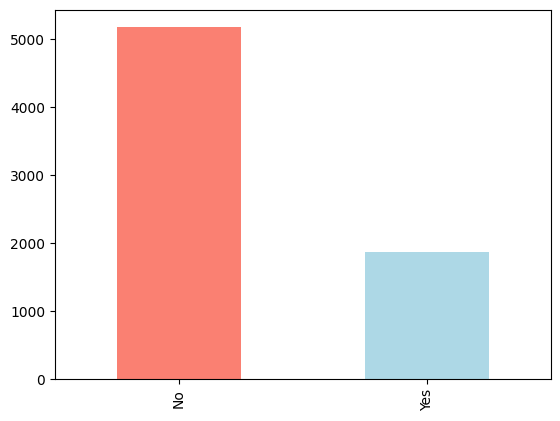

In [25]:
df['Churn'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [27]:
# Check for any missing values

df.isna().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [28]:
df.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: ylabel='Frequency'>

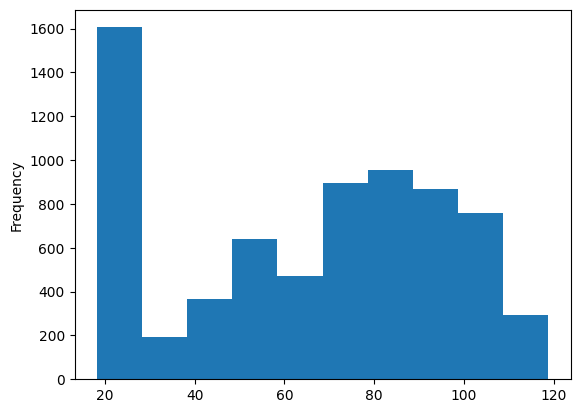

In [29]:
# Check the distribution for the age column with a histogram
df["Monthly Charges"].plot(kind="hist")

In [30]:
# Make a Correlation Matrix
df.corr()

<ipython-input-30-368dfe318325>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Senior Citizen,tenure,Monthly Charges
Senior Citizen,1.000000,0.016645,0.220222
tenure,0.016645,1.000000,0.248058
Monthly Charges,0.220222,0.248058,1.000000


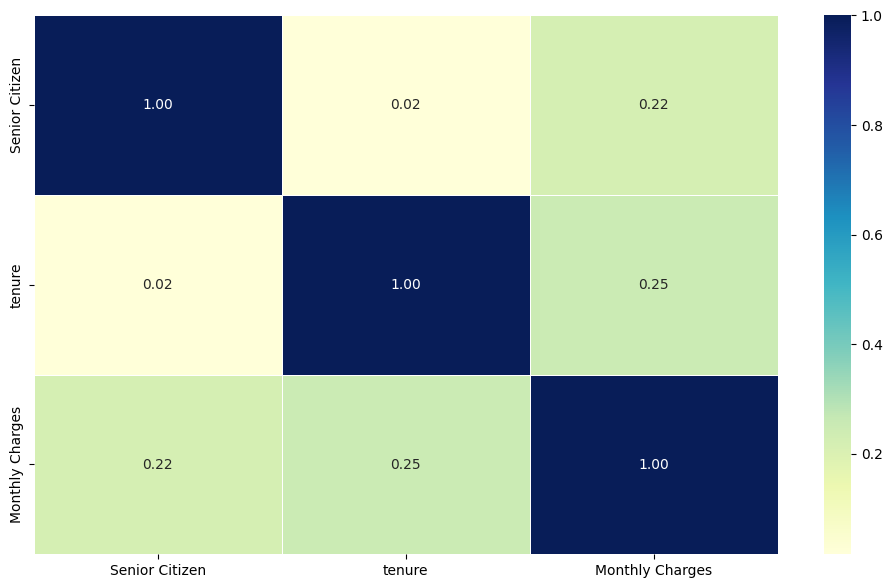

In [31]:
# Let's make the correlation matrix more visual
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [32]:
X = pd.get_dummies(df.drop(['Customer ID', 'Churn'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [33]:
np.random.seed(42)

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train.head()

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
1161,1,23,95.10,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3780,1,66,79.40,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3044,1,2,30.40,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4085,0,1,78.05,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1362,0,4,78.45,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y_train.head()

1161    0
3780    1
3044    1
4085    1
1362    1
Name: Churn, dtype: int64

# Train an Sklearn model on the data

In [ ]:
# Put the models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Regression": RandomForestClassifier()}

# Create a function to fit and score models on test data
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of Scikit_Learn machine learning models.
    X_train : Training data (no labels)
    X_test : Testing data (no labels)
    y_train : Training labels
    y_test : Testing labels
    """
    # Set Random Seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model on training data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_scores

{'Logistic Regression': 0.8055358410220014,
 'KNN': 0.7778566359119943,
 'Random Forest Regression': 0.7849538679914834}

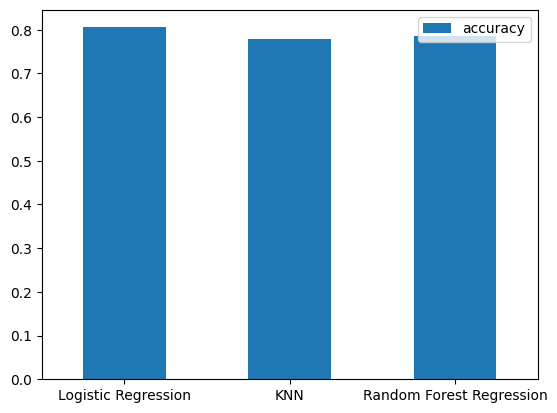

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0);

Let's look at the following:

- Hyperparameter Tuning
- Feature Importance
- Confusion Matrix
- Cross Validation
- Precision
- Recall
- F1 Score
- Classification Report
- ROC curve
- Area under the curve (AUC)

## Hyperparameter Tuning

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n-neighbors
neighbors = range(1, 21)

# Setup KNN neighbours
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores, test_scores

([0.9976929902395741,
  0.8686779059449867,
  0.8642413487133984,
  0.8399290150842946,
  0.8390417036379769,
  0.8294587400177462,
  0.8266193433895297,
  0.8218278615794143,
  0.8149068322981367,
  0.8149068322981367,
  0.8097604259094943,
  0.8099378881987578,
  0.8063886424134872,
  0.8108251996450754,
  0.8094055013309671,
  0.808695652173913,
  0.8090505767524401,
  0.8088731144631766,
  0.8078083407275953,
  0.8069210292812777],
 [0.7381121362668559,
  0.7764371894960965,
  0.7714691270404542,
  0.7828246983676366,
  0.7778566359119943,
  0.7849538679914834,
  0.7899219304471257,
  0.794889992902768,
  0.7877927608232789,
  0.794889992902768,
  0.7899219304471257,
  0.7998580553584103,
  0.7991483321504613,
  0.8019872249822569,
  0.7970191625266146,
  0.801277501774308,
  0.8019872249822569,
  0.801277501774308,
  0.8041163946061036,
  0.8034066713981547])

Maximun KNN score on the test set: 80.41%


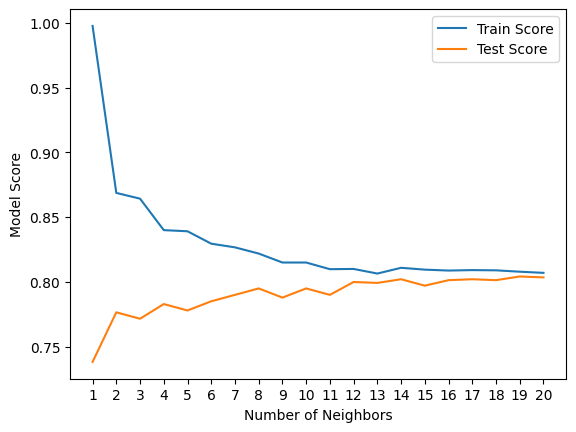

In [ ]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")

plt.xlabel("Number of Neighbors")
plt.xticks(np.arange(1, 21, 1))
plt.ylabel("Model Score")
plt.legend()

print(f"Maximun KNN score on the test set: {max(test_scores)*100:.2f}%")

## Hyperparameters tuning for RandomizeSearchCV
- LogisticRegression()
- RandomForestClassifier()

In [ ]:
# Create a hyperparameter grid for LogisticRegression()
log_rid_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_rid_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter for search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8112136266855926

In [ ]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter for search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.794889992902768

In [ ]:
model_scores

{'Logistic Regression': 0.8055358410220014,
 'KNN': 0.7778566359119943,
 'Random Forest Regression': 0.7849538679914834}

## Hyperparameter Tuning with GridSearchCV
LogisticRegression has given the best result so far, we will try to improve it using GridSearchCV...


In [ ]:
# Different hyperparameters for our LogisticRegression model
log_rid_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_rid_grid,
                          cv=5,
                          verbose=True)

# Fit the grid hyperparameter seach model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.012742749857031334, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8112136266855926

## Evaluating our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC curve
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1-score

In [ ]:
# Make predicitions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds, y_test

(array([1, 0, 0, ..., 1, 0, 0]),
 185     1
 2716    0
 960     0
 3731    1
 132     1
        ..
 15      0
 6367    0
 315     1
 2440    0
 5003    0
 Name: Churn, Length: 1409, dtype: int64)

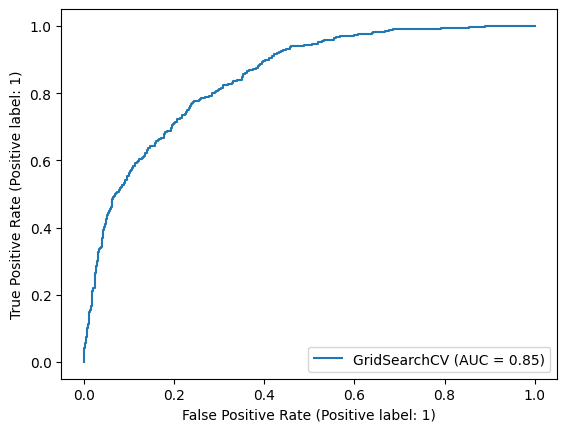

In [ ]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[946  94]
 [172 197]]


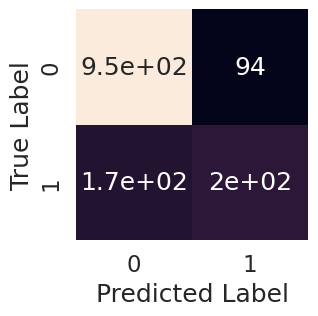

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
     Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                      annot=True,
                      cbar=False)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1040
           1       0.68      0.53      0.60       369

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.23357214690901212,
                         solver= 'liblinear')

In [ ]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8015329618039873

In [ ]:
# Cross validated precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.6501489021955003

In [ ]:
# Cross validated recall
cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.5446688936359335

In [ ]:
# Cross validated f1 score
cv_f1s = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1s = np.mean(cv_f1s)
cv_f1s

0.5926809295257038

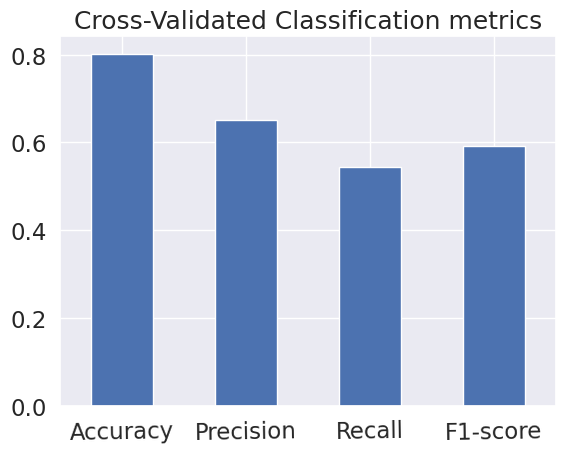

In [ ]:
# Visualize the cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_rec,
                           "F1-score": cv_f1s},
                          index=[0])

cv_metrics.T.plot(kind="bar",
                  title="Cross-Validated Classification metrics",
                  legend=False,
                  rot=1);

## Feature Importance

In [ ]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [ ]:
# Fit an instance of LogisticRegression()
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.012742749857031334,
                         solver= 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.012742749857031334, solver='liblinear')

In [ ]:
# Check for coefficient
clf.coef_

array([[ 0.20460259, -0.03817025,  0.00835116, ...,  0.00528658,
        -0.00699048, -0.00698963]])

In [ ]:
# Match the coefs_ of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Customer ID': 0.20460258501941303,
 'Gender': -0.038170247214264943,
 'Senior Citizen': 0.008351158006818954,
 'Partner': -0.06894684500797332,
 'Dependents': -0.09401566930528703,
 'tenure': -0.09910242912464809,
 'Phone Service': -0.06386008518861228,
 'Multiple Lines': -0.0015004665379330262,
 'Internet Service': -0.16146204777532983,
 'Online Security': 0.03835893229249703,
 'Online Backup': -0.20132144660575255,
 'Device Protection': -0.25302378623817046,
 'Tech Support': 0.03835893229249703,
 'Streaming TV': 0.05170233963241437,
 'Streaming Movies': -0.29898267735062567,
 'Contract': 0.2565983163619991,
 'Paperless Billing': -0.12057815332463036,
 'Payment Method': 0.17234682360738046,
 'Monthly Charges': -0.12057815332463036,
 'Total Charges': -0.21473118459600601,
 'Churn': 0.029644344784358526}

<Axes: title={'center': 'Feature Importance'}>

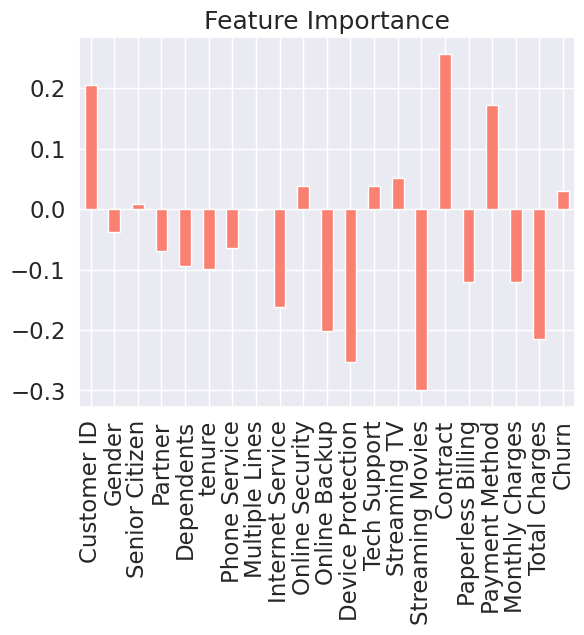

In [ ]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar",
                  title="Feature Importance",
                  legend=False,
                  color='salmon')

In [ ]:
import pickle

# Save trained model to file
pickle.dump(clf, open("/content/drive/MyDrive/Colab Notebooks/Customer-Churning-Prediction/sklearn-model/logistic_regression-model.pkl", "wb"))

# Train a TensorFlow model on the Data

In [54]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

### Build and compile the model

In [55]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')

### Fit, Predict and Evaluate

In [57]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
177/177 [==============================] - 3s 4ms/step - loss: 0.4526 - accuracy: 0.7881
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.7970
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4052 - accuracy: 0.8085
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.3920 - accuracy: 0.8165
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 0.3634 - accuracy: 0.8360
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8580
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.2715 - accuracy: 0.8972
Epoch 8/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1954 - accuracy: 0.9363
Epoch 9/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1297 - accuracy: 0.9631
Epoch 10/100
177/177 [==============================] - 1s 4ms/step - loss: 0.0906 - accura

In [58]:
y_preds_tf = model.predict(X_test)
y_preds_tf = [0 if val < 0.5 else 1 for val in y_preds_tf]

45/45 [==============================] - 0s 3ms/step


In [59]:
y_preds_tf[:5]

[1, 1, 0, 1, 0]

In [60]:
accuracy_score(y_test, y_preds_tf)

0.6756564939673527

The number above reveals that the model is right nearly 70% of the times. To improve its accuracy we can:
- Get more data.
- Train it for longer by increasing the epoch.<br>
 **Note** : Although this may take longer to train and may also result in Overfitting.

In [47]:
# Save and reload the model
model.save('/content/drive/MyDrive/Colab Notebooks/Customer-Churning-Prediction/tensorflow-model/')

In [61]:
del model

In [62]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/Customer-Churning-Prediction/tensorflow-model/')